In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

df = pd.read_csv('../data/processed_flood_analysis_data.csv', index_col='dateOfLoss',  parse_dates=['dateOfLoss'])
print("New start date:", df['Date'].min())
print("New end date:", df['Date'].max())
df['rolling_avg_12'] = df['claimsPerCapita'].rolling(window=12).mean()

New start date: 1978-02-01
New end date: 2025-01-01


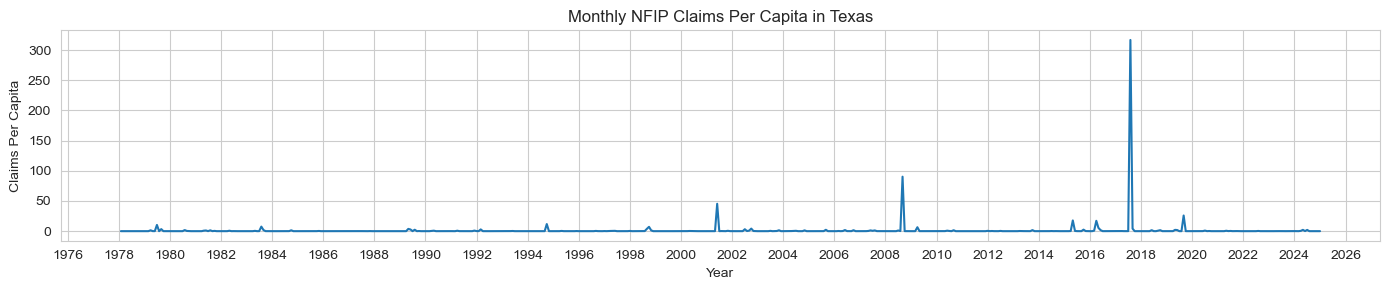

In [3]:
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(14, 3))
sns.lineplot(data=df, x=df.index, y='claimsPerCapita')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Monthly NFIP Claims Per Capita in Texas')
plt.xlabel('Year')
plt.ylabel('Claims Per Capita')
plt.tight_layout()
plt.show()

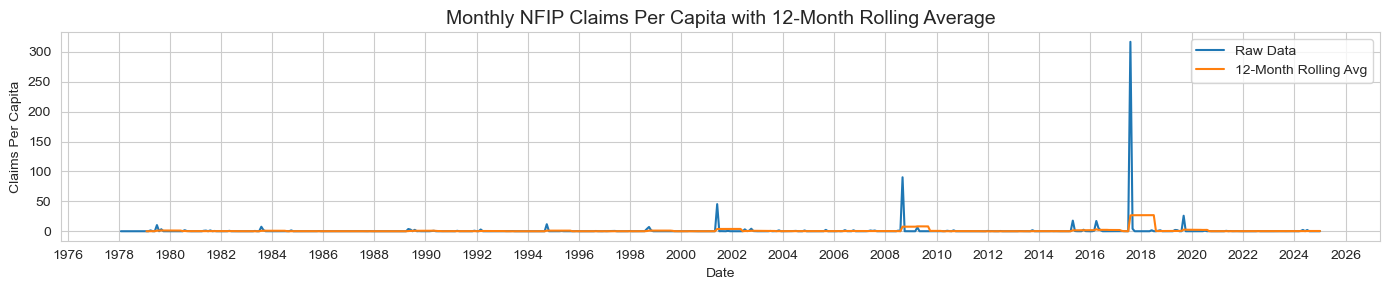

In [4]:
import matplotlib.dates as mdates
import seaborn as sns

plt.figure(figsize=(14, 3))
sns.lineplot(data=df, x=df.index, y='claimsPerCapita', label='Raw Data')
sns.lineplot(data=df, x=df.index, y='rolling_avg_12', label='12-Month Rolling Avg')
# Format x-axis to show ticks every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Monthly NFIP Claims Per Capita with 12-Month Rolling Average', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Claims Per Capita')
plt.tight_layout()
plt.show()

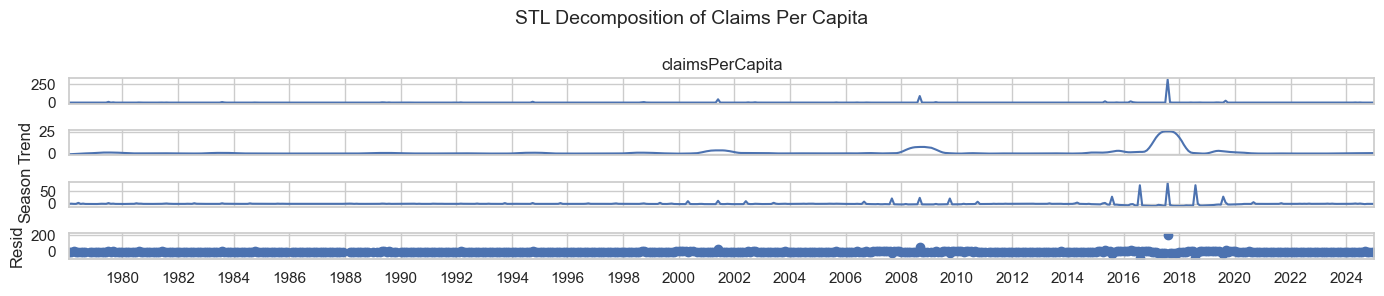

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
stl = STL(df['claimsPerCapita'], period=12)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(14, 3)
fig.suptitle('STL Decomposition of Claims Per Capita', fontsize=14)
for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


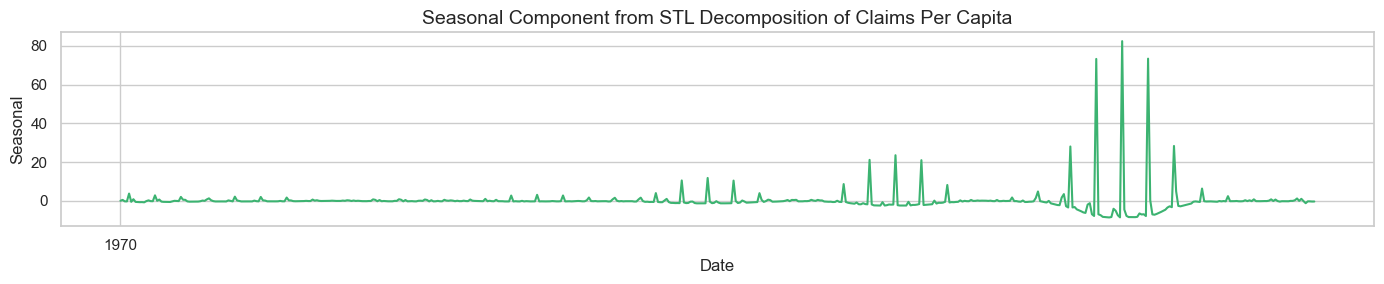

In [7]:
stl = STL(df['claimsPerCapita'], period=12)
res = stl.fit()
plt.figure(figsize=(14, 3))
plt.plot(df['Date'], res.seasonal, label='Seasonal Component', color='mediumseagreen')
plt.title('Seasonal Component from STL Decomposition of Claims Per Capita', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

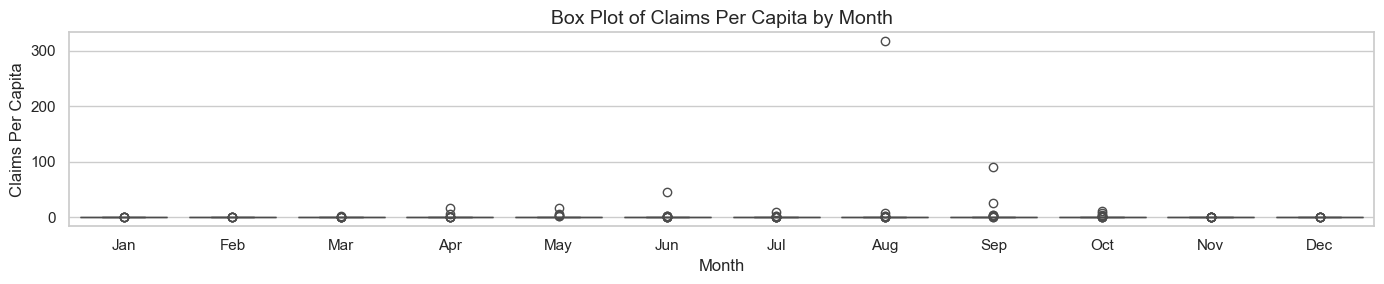

In [8]:
df['Date'] = pd.to_datetime(df['Date']) 
df['month'] = df['Date'].dt.month    
plt.figure(figsize=(14, 3))
sns.boxplot(x='month', y='claimsPerCapita', data=df)
plt.title('Box Plot of Claims Per Capita by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Claims Per Capita')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

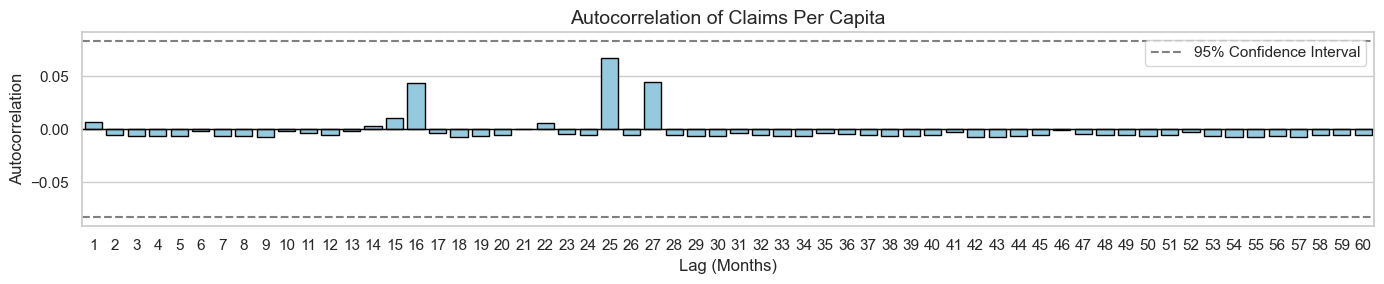

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

max_lag = 60
acf_values = [df['claimsPerCapita'].autocorr(lag=i) for i in range(1, max_lag + 1)]
acf_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'Autocorrelation': acf_values
})
plt.figure(figsize=(14, 3))
sns.barplot(x='Lag', y='Autocorrelation', data=acf_df, color='skyblue', edgecolor='black')

# horizontal confidence bounds ~95% for large samples
n = len(df['claimsPerCapita'].dropna())
conf_bound = 1.96 / np.sqrt(n)
plt.axhline(y=conf_bound, color='gray', linestyle='--', label='95% Confidence Interval')
plt.axhline(y=-conf_bound, color='gray', linestyle='--')
plt.axhline(y=0, color='black', linewidth=1)
plt.title('Autocorrelation of Claims Per Capita', fontsize=14)
plt.xlabel('Lag (Months)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.tight_layout()
plt.show()

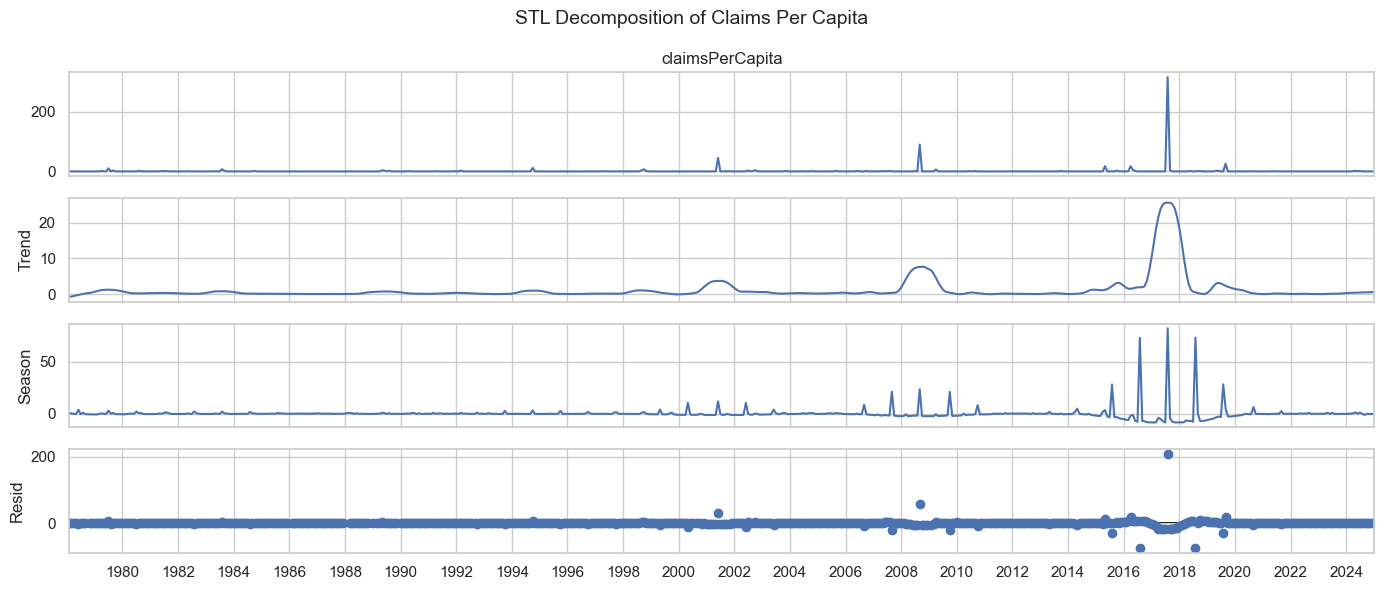

In [11]:
from statsmodels.tsa.seasonal import STL

df_decomp = df.set_index('Date')
stl = STL(df_decomp['claimsPerCapita'], period=12)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(14, 6)
fig.suptitle('STL Decomposition of Claims Per Capita', fontsize=14)
for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df['t'] = np.arange(1, len(df) + 1)
X = sm.add_constant(df['t'])
y = df['claimsPerCapita']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        claimsPerCapita   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.963
Date:                Sun, 04 May 2025   Prob (F-statistic):              0.162
Time:                        11:18:57   Log-Likelihood:                -2255.0
No. Observations:                 554   AIC:                             4514.
Df Residuals:                     552   BIC:                             4523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2562      1.208     -0.212      0.8

In [13]:
sum = df[['totalAmountPaid', 'ONI_Anomaly', "Resident Population", 'claimsPerCapita']]
summary_statistics = sum.describe()
summary_statistics

,totalAmountPaid,ONI_Anomaly,Resident Population,claimsPerCapita
count,5.540000e+02,554.000000,5.540000e+02,5.540000e+02
mean,3.100940e+07,0.028646,2.189882e+07,1.210516e+00
std,3.950972e+08,0.846488,5.257151e+06,1.421148e+01
min,1.000000e+00,-1.800000,1.364877e+07,5.735499e-08
25%,6.456594e+04,-0.540000,1.705716e+07,3.306784e-03
50%,3.853059e+05,-0.055000,2.162112e+07,1.948923e-02
75%,1.993036e+06,0.487500,2.653601e+07,8.570539e-02
max,8.927813e+09,2.640000,3.129083e+07,3.168321e+02


In [15]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    if result[1] <= 0.05:
        print("Conclusion: Data is stationary (reject H0)")
    else:
        print("Conclusion: Data is non-stationary (fail to reject H0)")

# KPSS Test
def kpss_test(series):
    result = kpss(series)
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    
    if result[1] <= 0.05:
        print("Conclusion: Data is non-stationary (reject H0)")
    else:
        print("Conclusion: Data is stationary (fail to reject H0)")

# Apply tests
adf_test(df['ONI_Anomaly'])
kpss_test(df['ONI_Anomaly'])

ADF Statistic: -6.4093764805924245
p-value: 1.9076042980526582e-08
Critical Values:
	1%: -3.4425405682241816
	5%: -2.8669171671779816
	10%: -2.5696338432333636
Conclusion: Data is stationary (reject H0)
KPSS Statistic: 0.08307735758904929
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Conclusion: Data is stationary (fail to reject H0)


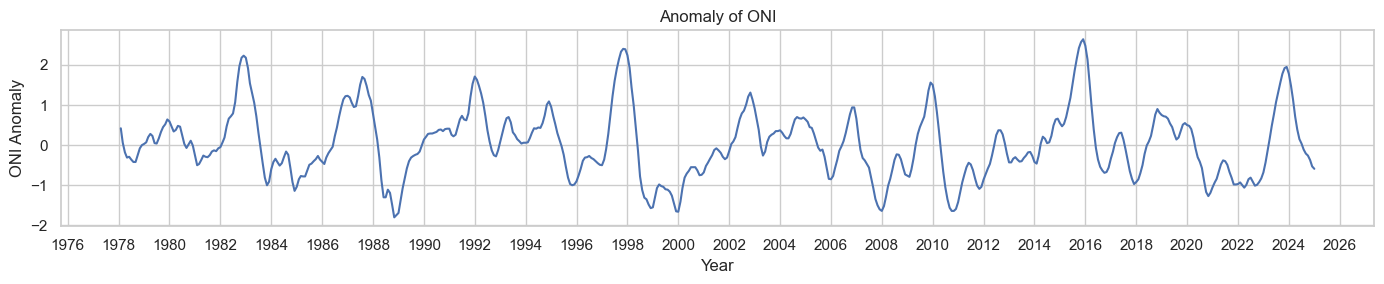

In [16]:
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(14, 3))
sns.lineplot(data=df, x=df.index, y='ONI_Anomaly')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Anomaly of ONI')
plt.xlabel('Year')
plt.ylabel('ONI Anomaly')
plt.tight_layout()
plt.show()

In [17]:
df[f'ONI_Anomaly_lag2'] = df['ONI_Anomaly'].shift()*2
df[f'ONI_Anomaly_lag3'] = df['ONI_Anomaly'].shift()*3
df[f'ONI_Anomaly_lag4'] = df['ONI_Anomaly'].shift()*4
df[f'ONI_Anomaly_lag14'] = df['ONI_Anomaly'].shift()*14
df = df.dropna().reset_index(drop=True)
df['diff_claimsPerCapita'] = df['claimsPerCapita'].diff()
df['log_diff_claimsPerCapita'] = np.log(df['claimsPerCapita']).diff()
df['log_claimsPerCapita'] = np.log(df['claimsPerCapita'])
df = df.dropna().reset_index(drop=True)
print(df.index.min(), "to", df.index.max())
print("New start date:", df['Date'].min())
print("New end date:", df['Date'].max())

0 to 541
New start date: 1979-03-01 00:00:00
New end date: 2025-01-01 00:00:00


In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
data = df[['log_diff_claimsPerCapita', 'ONI_Anomaly']]
grangercausalitytests(data, maxlag=30, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0233  , p=0.8787  , df_denom=538, df_num=1
ssr based chi2 test:   chi2=0.0235  , p=0.8783  , df=1
likelihood ratio test: chi2=0.0235  , p=0.8783  , df=1
parameter F test:         F=0.0233  , p=0.8787  , df_denom=538, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6134  , p=0.5419  , df_denom=535, df_num=2
ssr based chi2 test:   chi2=1.2382  , p=0.5384  , df=2
likelihood ratio test: chi2=1.2368  , p=0.5388  , df=2
parameter F test:         F=0.6134  , p=0.5419  , df_denom=535, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3083  , p=0.2709  , df_denom=532, df_num=3
ssr based chi2 test:   chi2=3.9765  , p=0.2640  , df=3
likelihood ratio test: chi2=3.9619  , p=0.2656  , df=3
parameter F test:         F=1.3083  , p=0.2709  , df_denom=532, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8543  , p=0.4913  

{1: ({'ssr_ftest': (0.023329758941438936, 0.8786599329227607, 538.0, 1),
   'ssr_chi2test': (0.023459850534049188, 0.8782672998779029, 1),
   'lrtest': (0.02345934189406762, 0.8782686092591228, 1),
   'params_ftest': (0.023329758941685895, 0.8786599329221441, 538.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6133626715456759, 0.5419071829725789, 535.0, 2),
   'ssr_chi2test': (1.2381900659239813, 0.5384314799243661, 2),
   'lrtest': (1.236772681574621, 0.5388131973448882, 2),
   'params_ftest': (0.613362671545596, 0.5419071829726436, 535.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.3082822278005404, 0.27088933389287484, 532.0, 3),
   'ssr_chi2test': (3.9764894029200635, 0.26401406652940973, 3),
   'lrtest': (3.9618928125223647, 0.2656085279335257, 3),
   'params_ftest': (1.3082822278005544, 0.2708893338928507, 532.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

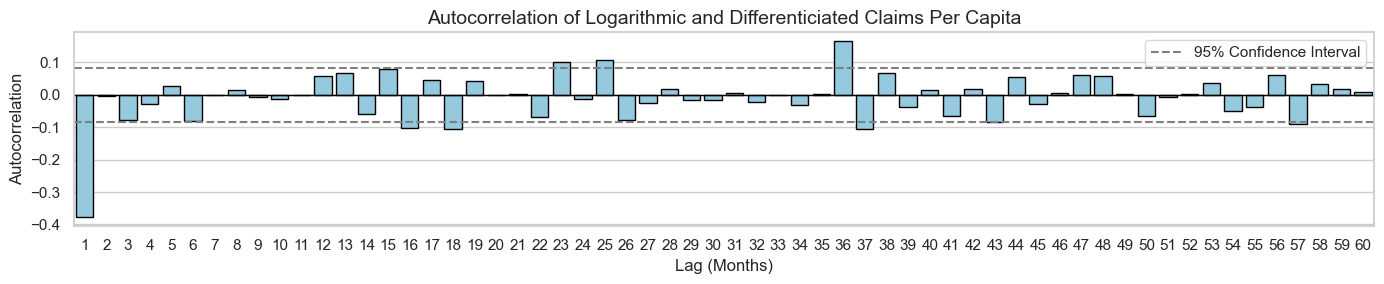

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

max_lag = 60
acf_values = [df['log_diff_claimsPerCapita'].autocorr(lag=i) for i in range(1, max_lag + 1)]
acf_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'Autocorrelation': acf_values
})

plt.figure(figsize=(14, 3))
sns.barplot(x='Lag', y='Autocorrelation', data=acf_df, color='skyblue', edgecolor='black')
n = len(df['claimsPerCapita'].dropna())
conf_bound = 1.96 / np.sqrt(n)
plt.axhline(y=conf_bound, color='gray', linestyle='--', label='95% Confidence Interval')
plt.axhline(y=-conf_bound, color='gray', linestyle='--')
plt.axhline(y=0, color='black', linewidth=1)

plt.title('Autocorrelation of Logarithmic and Differenticiated Claims Per Capita', fontsize=14)
plt.xlabel('Lag (Months)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.tight_layout()
plt.show()

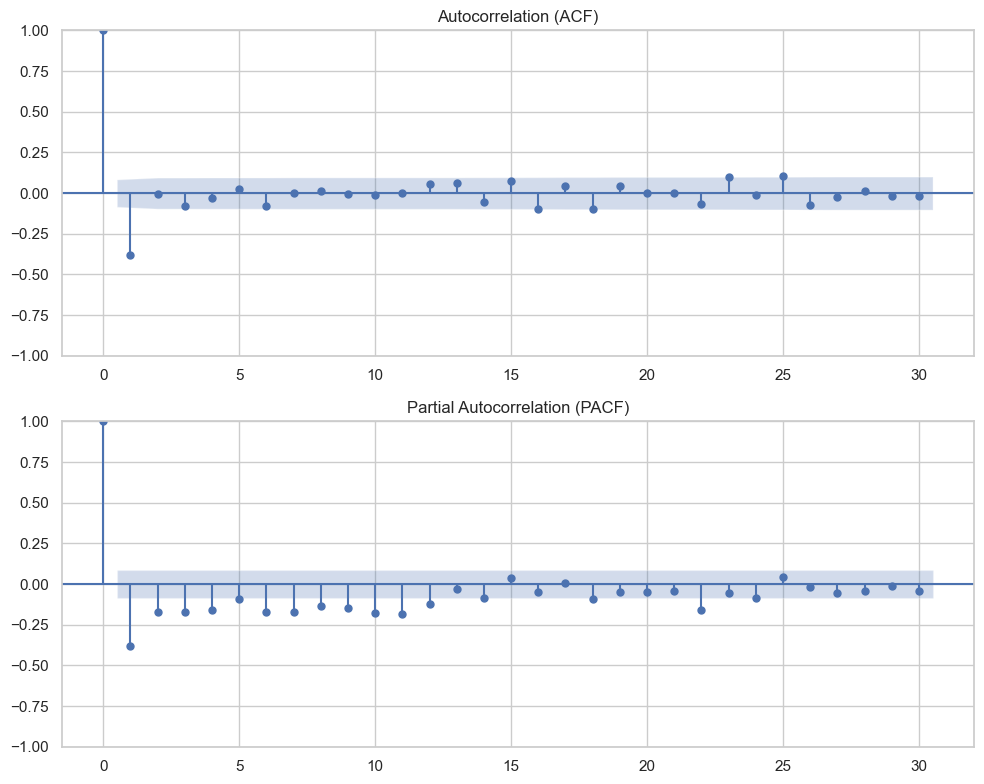

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
difft = df['log_diff_claimsPerCapita']
plot_acf(difft, ax=axes[0], lags=30)
axes[0].set_title('Autocorrelation (ACF)')
plot_pacf(df['log_diff_claimsPerCapita'], ax=axes[1], lags=30, method='ywm')
axes[1].set_title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()

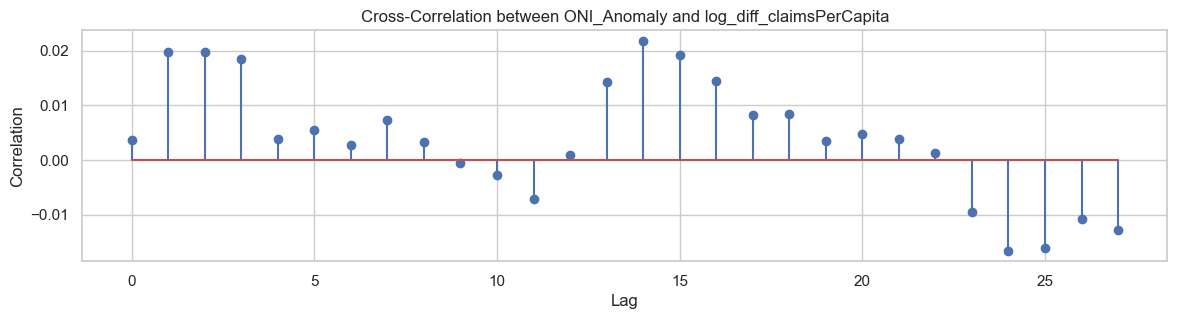

In [18]:
from statsmodels.tsa.stattools import ccf

x = df['ONI_Anomaly']  
y = df['log_diff_claimsPerCapita']  
plt.figure(figsize=(14, 3))
cross_corr = ccf(x, y)[:28]  
plt.stem(range(len(cross_corr)), cross_corr)
plt.title("Cross-Correlation between ONI_Anomaly and log_diff_claimsPerCapita")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

In [21]:
sum = df[['totalAmountPaid', "Resident Population", 'claimsPerCapita', 'ONI_Anomaly']]
summary_statistics = sum.describe()
summary_statistics

,totalAmountPaid,Resident Population,claimsPerCapita,ONI_Anomaly
count,5.420000e+02,5.420000e+02,5.420000e+02,542.000000
mean,3.168832e+07,2.207824e+07,1.236766e+00,0.032011
std,3.994283e+08,5.173156e+06,1.436712e+01,0.854757
min,1.000000e+00,1.397510e+07,5.735499e-08,-1.800000
25%,6.574221e+04,1.734822e+07,3.375266e-03,-0.550000
50%,3.998922e+05,2.183446e+07,1.959128e-02,-0.045000
75%,2.088162e+06,2.663678e+07,8.747801e-02,0.500000
max,8.927813e+09,3.129083e+07,3.168321e+02,2.640000


In [22]:
sum = df[['log_diff_claimsPerCapita', 'ONI_Anomaly', 'ONI_Anomaly_lag14']]
summary_statistics = sum.describe()
summary_statistics

,log_diff_claimsPerCapita,ONI_Anomaly,ONI_Anomaly_lag14
count,542.000000,542.000000,542.000000
mean,0.000763,0.032011,0.465203
std,3.257539,0.854757,11.960755
min,-11.558598,-1.800000,-25.200000
25%,-2.061176,-0.550000,-7.700000
50%,-0.085497,-0.045000,-0.560000
75%,1.855527,0.500000,7.000000
max,16.390786,2.640000,36.960000


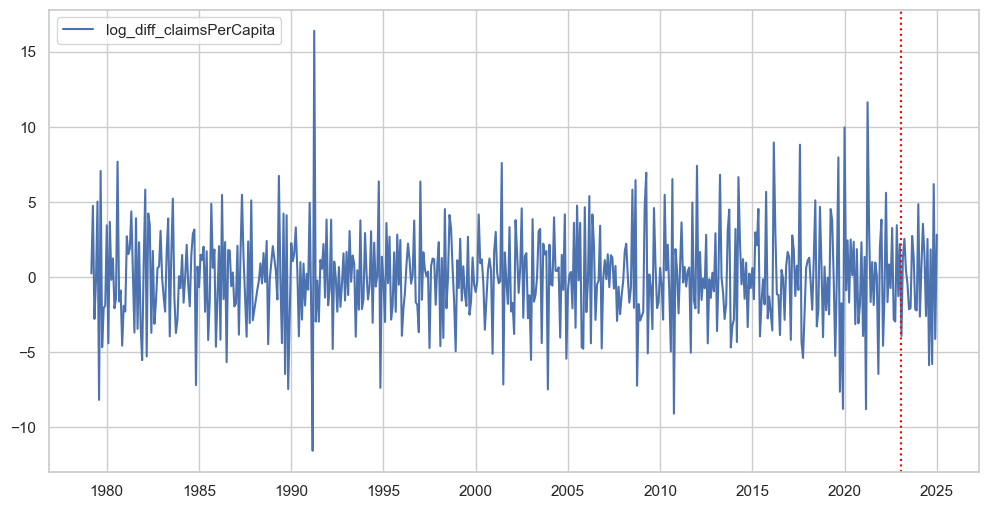

In [23]:
MAX_TRAINING_DATE = df.tail(24).iloc[0]['Date']
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['log_diff_claimsPerCapita'], label='log_diff_claimsPerCapita')
plt.axvline(MAX_TRAINING_DATE, color='red', linestyle='dotted')
plt.legend()
plt.show()
df_train = df.loc[df['Date'] < MAX_TRAINING_DATE, :]
df_test = df.loc[df['Date'] >= MAX_TRAINING_DATE, :]

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def randomParameterStepper(current_parameters):
    modified_parameters = deepcopy(current_parameters)
    parameter_to_change = np.random.choice(['p', 'd', 'q', 'a0', 'a1'])
    if parameter_to_change in ['p', 'q']:
        lower_bound, upper_bound = 0, 5
    elif parameter_to_change in ['d']:
        lower_bound, upper_bound = 0, 1
    else:
        lower_bound, upper_bound = 0, 1

    modified_parameters[parameter_to_change] = np.clip(modified_parameters[parameter_to_change] + np.random.choice([-1, 1]), lower_bound, upper_bound)
    return modified_parameters

def evaluate_sarimax_model(model_parameters, training_data, testing_data):
    try:
        cpu = psutil.cpu_percent(percpu=True)
        mem = psutil.virtual_memory().used
        print(f"CPU before model fit: {cpu}%, RAM used: {mem /1024**2} MB")
        model = SARIMAX(
            endog=training_data['log_diff_claimsPerCapita'],
            order=(model_parameters['p'], model_parameters['d'], model_parameters['q']),
            trend=[model_parameters['a0'], model_parameters['a1']]
        ).fit(disp=False)
        cpu = psutil.cpu_percent(percpu=True)
        mem = psutil.virtual_memory().used
        print(f"CPU during model fit: {cpu}%, RAM used: {mem/1024**2} MB")
        forecast = model.forecast(steps=len(testing_data))
        actual = testing_data['log_diff_claimsPerCapita']
        cpu = psutil.cpu_percent(percpu=True)
        mem = psutil.virtual_memory().used
        print(f"CPU during test: {cpu}%, RAM used: {mem/1024**2} MB")
        mse = mean_squared_error(actual, forecast)
        rmse = np.sqrt(mse)
        r2 = r2_score(actual, forecast)
        resources = [cpu, mem/1024**2]
        return rmse, mse, r2, resources
    except:
        return np.inf, np.inf, np.nan, np.nan

def try_parameter_set(initial_parameters, training_data, testing_data):
    new_parameters = randomParameterStepper(initial_parameters)
    rmse, mse, r2 = evaluate_sarimax_model(new_parameters, training_data, testing_data)
    return new_parameters, rmse, mse, r2

def run_stochastic_parallel_optimization(df_train, df_test, exo, optimization_steps, n_jobs, temperature=0.05):
    initial_parameters = {'p': 1, 'd': 0, 'q': 0, 'a0': 1, 'a1': 0}

    
    best_params = deepcopy(initial_parameters)
    initial_rmse, initial_mse, initial_r2, resources = evaluate_sarimax_model(initial_parameters, df_train, df_test)
    best_rmse = initial_rmse
    
    optimization_progress = []

    for step_id in tqdm(range(optimization_steps), desc="Optimizing"):
        candidate_results = Parallel(n_jobs=n_jobs)(
            delayed(try_parameter_set)(initial_parameters, df_train, df_test) for _ in range(n_jobs)
        )
        candidate_parameters, candidate_rmse, candidate_mse, candidate_r2 = min(candidate_results, key=lambda x: x[1])

        if candidate_rmse < initial_rmse:
            initial_parameters = deepcopy(candidate_parameters)
            initial_rmse = candidate_rmse
        else:
            if np.random.random() < 2 ** (-(candidate_rmse - initial_rmse) / temperature):
                initial_parameters = deepcopy(candidate_parameters)
                initial_rmse = candidate_rmse

        if initial_rmse < best_rmse:
            best_rmse = initial_rmse
            best_params = deepcopy(initial_parameters)

        optimization_progress.append({
            'step': step_id,
            'rmse': initial_rmse,
            'mse': candidate_mse,
            'r2': candidate_r2,
            'params': deepcopy(initial_parameters),
            'resources': deepcopy(resources)
            
        })

    return best_params, pd.DataFrame(optimization_progress)


In [25]:
from tqdm import tqdm
from joblib import Parallel, delayed
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from copy import deepcopy
import numpy as np
import psutil

def randomParameterStepper(current_parameters):
    modified_parameters = deepcopy(current_parameters)
    parameter_to_change = np.random.choice(['p', 'd', 'q', 'a0', 'a1'])
    if parameter_to_change in ['p', 'q', 'd']:
        lower_bound, upper_bound = 0, 5
    elif parameter_to_change in ['d']:
        lower_bound, upper_bound = 0, 1
    else:
        lower_bound, upper_bound = 0, 1

    modified_parameters[parameter_to_change] = np.clip(
        modified_parameters[parameter_to_change] + np.random.choice([-1, 1]),
        lower_bound, upper_bound
    )
    return modified_parameters

def evaluate_sarimax_model(model_parameters, training_data, testing_data):
    try:
        cpu_before = psutil.cpu_percent(percpu=True)
        mem_before = psutil.virtual_memory().used / 1024**2
        print(f"[BEFORE FIT] CPU per core: {cpu_before}, RAM used: {mem_before:.2f} MB")

        model = ARIMA(
            endog=training_data['log_diff_claimsPerCapita'],
            order=(model_parameters['p'], model_parameters['d'], model_parameters['q']),
            trend=[model_parameters['a0'], model_parameters['a1']]
        ).fit()

        cpu_after_fit = psutil.cpu_percent(percpu=True)
        mem_after_fit = psutil.virtual_memory().used / 1024**2
        print(f"[AFTER FIT] CPU per core: {cpu_after_fit}, RAM used: {mem_after_fit:.2f} MB")
        cpu_during_forecast = []
        forecast_chunks = []
        chunk_size = max(1, len(testing_data) // 10)
        
        for i in range(0, len(testing_data), chunk_size):
            end_i = min(i + chunk_size, len(testing_data))
            chunk = model.forecast(steps=(end_i - i))
            forecast_chunks.append(chunk)
            cpu_during_forecast.append(psutil.cpu_percent(percpu=True))
        
        forecast = pd.concat(forecast_chunks)
        cpu_during_forecast_avg = np.mean(cpu_during_forecast, axis=0).tolist()
        actual = testing_data['log_diff_claimsPerCapita']
        cpu_after_forecast = psutil.cpu_percent(percpu=True)
        mem_after_forecast = psutil.virtual_memory().used / 1024**2
        print(f"[AFTER FORECAST] CPU per core: {cpu_after_forecast}, RAM used: {mem_after_forecast:.2f} MB")

        mse = mean_squared_error(actual, forecast)
        rmse = np.sqrt(mse)
        r2 = r2_score(actual, forecast)

        resources = {
            'cpu_before_fit': cpu_before,
            'cpu_after_fit': cpu_after_fit,
            'cpu_after_forecast': cpu_after_forecast,
            'cpu_during_forecast': cpu_during_forecast_avg,
            'ram_before_fit_mb': mem_before,
            'ram_after_fit_mb': mem_after_fit,
            'ram_after_forecast_mb': mem_after_forecast
        }

        return rmse, mse, r2, resources

    except Exception as e:
        print(f"Model failed: {e}")
        return np.inf, np.inf, np.nan, {
            'cpu_before_fit': np.nan,
            'cpu_after_fit': np.nan,
            'cpu_after_forecast': np.nan,
            'cpu_during_forecast': np.nan,
            'ram_before_fit_mb': np.nan,
            'ram_after_fit_mb': np.nan,
            'ram_after_forecast_mb': np.nan
        }

def try_parameter_set(initial_parameters, training_data, testing_data):
    new_parameters = randomParameterStepper(initial_parameters)
    rmse, mse, r2, resources = evaluate_sarimax_model(new_parameters, training_data, testing_data)
    return new_parameters, rmse, mse, r2, resources

def run_stochastic_parallel_optimization(df_train, df_test, optimization_steps, n_jobs, temperature):
    initial_parameters = {'p': 3, 'd': 1, 'q': 1, 'a0': 1, 'a1': 0}

    best_params = deepcopy(initial_parameters)
    initial_rmse, initial_mse, initial_r2, initial_resources = evaluate_sarimax_model(
        initial_parameters, df_train, df_test
    )
    best_rmse = initial_rmse
    optimization_progress = []

    for step_id in tqdm(range(optimization_steps), desc="Optimizing"):
        candidate_results = Parallel(n_jobs=n_jobs)(
            delayed(try_parameter_set)(initial_parameters, df_train, df_test) for _ in range(n_jobs)
        )

        candidate_parameters, candidate_rmse, candidate_mse, candidate_r2, candidate_resources = min(
            candidate_results, key=lambda x: x[1]
        )

        if candidate_rmse < initial_rmse:
            initial_parameters = deepcopy(candidate_parameters)
            initial_rmse = candidate_rmse
        else:
            if np.random.random() < 2 ** (-(candidate_rmse - initial_rmse) / temperature):
                initial_parameters = deepcopy(candidate_parameters)
                initial_rmse = candidate_rmse

        if initial_rmse < best_rmse:
            best_rmse = initial_rmse
            best_params = deepcopy(initial_parameters)

        optimization_progress.append({
            'step': step_id,
            'rmse': initial_rmse,
            'mse': candidate_mse,
            'r2': candidate_r2,
            'params': deepcopy(initial_parameters),
            'cpu_before_fit': candidate_resources['cpu_before_fit'],
            'cpu_after_fit': candidate_resources['cpu_after_fit'],
            'cpu_after_forecast': candidate_resources['cpu_after_forecast'],
            'cpu_during_forecast': candidate_resources['cpu_during_forecast'],
            'ram_before_fit_mb': candidate_resources['ram_before_fit_mb'],
            'ram_after_fit_mb': candidate_resources['ram_after_fit_mb'],
            'ram_after_forecast_mb': candidate_resources['ram_after_forecast_mb']
        })

    return best_params, pd.DataFrame(optimization_progress)

In [26]:
best_params, progress_df = run_stochastic_parallel_optimization(df_train, df_test, optimization_steps=40, n_jobs=8, temperature=0.05)

[BEFORE FIT] CPU per core: [32.5, 29.1, 31.0, 28.4, 22.2, 20.6, 19.8, 17.2, 15.9, 15.2], RAM used: 7418.08 MB
Model failed: In models with integration (`d > 0`) or seasonal integration (`D > 0`), trend terms of lower order than `d + D` cannot be (as they would be eliminated due to the differencing operation). For example, a constant cannot be included in an ARIMA(1, 1, 1) model, but including a linear trend, which would have the same effect as fitting a constant to the differenced data, is allowed.


Optimizing:   0%|          | 0/40 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Optimizing:  10%|█         | 4/40 [00:02<00:15,  2.37it/s]/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Optimizing:  12%|█▎        | 5/40 [00:02<00:13,  2.62it/s]/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Optimizing:  18%|█▊        | 7/40 [00:03<00:10,  3.16it/s]/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max

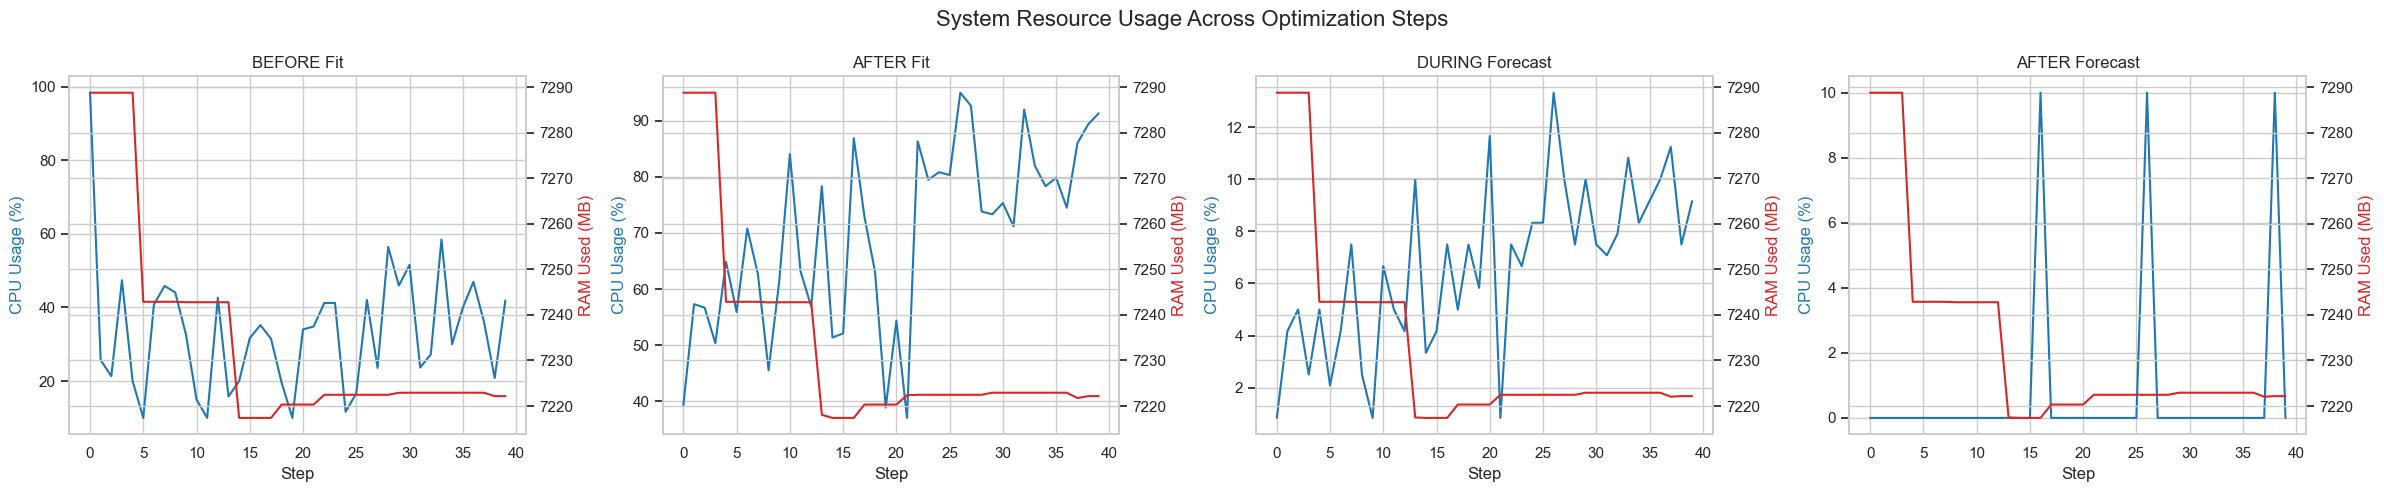

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 4, figsize=(24, 5), sharey=False)
cpu_cols = [
    'cpu_before_fit', 'cpu_after_fit', 'cpu_during_forecast', 'cpu_after_forecast'
]
ram_cols = [
    'ram_before_fit_mb', 'ram_after_fit_mb', 'ram_after_forecast_mb', 'ram_after_forecast_mb'
]
titles = ["BEFORE Fit", "AFTER Fit", "DURING Forecast", "AFTER Forecast"]

for i, (cpu_col, ram_col, title) in enumerate(zip(cpu_cols, ram_cols, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    ax1.plot(progress_df['step'], progress_df[cpu_col].apply(np.mean), label='CPU %', color='tab:blue')
    ax2.plot(progress_df['step'], progress_df[ram_col], label='RAM MB', color='tab:red')

    ax1.set_xlabel("Step")
    ax1.set_ylabel("CPU Usage (%)", color='tab:blue')
    ax2.set_ylabel("RAM Used (MB)", color='tab:red')
    ax1.set_title(title)
    ax1.grid(True)

plt.suptitle("System Resource Usage Across Optimization Steps", fontsize=16)
plt.tight_layout()
plt.show()

Best Parameters: {'p': 3, 'd': 0, 'q': 0, 'a0': 1, 'a1': 1}


<Axes: title={'center': 'RMSE over Steps'}, xlabel='step'>

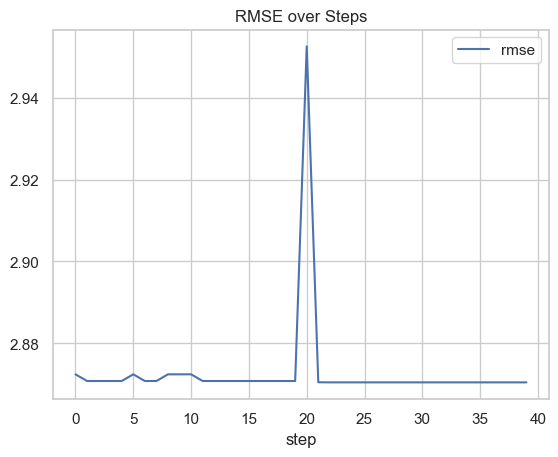

In [30]:
print("Best Parameters:", best_params)
progress_df.plot(x='step', y='rmse', title='RMSE over Steps')

In [31]:
progress_df

,step,rmse,mse,r2,params,cpu_before_fit,cpu_after_fit,cpu_after_forecast,cpu_during_forecast,ram_before_fit_mb,ram_after_fit_mb,ram_after_forecast_mb
0,0,2.872394,8.250645,0.190716,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 0}","[95.8, 95.0, 99.2, 98.3, 98.3, 98.3, 99.2, 100...","[26.7, 14.3, 62.5, 53.3, 66.7, 53.3, 64.3, 18....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.3333333333333...",7288.812500,7288.812500,7288.812500
1,1,2.870761,8.241266,0.191636,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 1}","[16.7, 33.3, 71.4, 42.9, 42.9, 33.3, 16.7, 0.0...","[22.2, 26.3, 83.3, 72.2, 61.1, 65.0, 68.4, 66....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.333333333333334, 0.0, 8.333333333333334, 8....",7288.812500,7288.812500,7288.812500
2,2,2.870761,8.241266,0.191636,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 1}","[25.0, 40.0, 25.0, 33.3, 25.0, 25.0, 40.0, 0.0...","[22.2, 22.2, 88.9, 68.8, 64.7, 52.9, 76.5, 70....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 8.333333333333334, 8.33333333333333...",7288.812500,7288.812500,7288.812500
3,3,2.870761,8.241266,0.191636,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 1}","[25.0, 16.7, 75.0, 60.0, 52.6, 42.1, 52.6, 55....","[27.8, 33.3, 72.2, 68.4, 57.9, 55.6, 57.9, 47....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 16.666666666666668, 0.0, 8.33333333...",7288.812500,7288.812500,7288.812500
4,4,2.870761,8.241266,0.191636,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 1}","[0.0, 0.0, 0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0...","[33.3, 29.4, 82.4, 76.5, 61.1, 55.6, 72.2, 83....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 8.333333333333334, 8.33333333333333...",7288.812500,7242.890625,7242.890625
5,5,2.872394,8.250645,0.190716,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 0}","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0...","[23.1, 30.8, 64.3, 46.2, 46.7, 50.0, 69.2, 76....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 8.333333333333334, 8.33333333333333...",7242.890625,7242.890625,7242.890625
6,6,2.870761,8.241266,0.191636,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 1}","[29.6, 32.1, 58.6, 42.9, 39.3, 39.3, 51.9, 42....","[33.3, 38.9, 77.8, 88.2, 78.9, 70.6, 77.8, 76....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 8.333333333333334, 8.33333333333333...",7242.890625,7242.890625,7242.890625
7,7,2.870761,8.241266,0.191636,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 1}","[29.4, 29.0, 62.3, 58.0, 49.3, 46.4, 54.3, 47....","[42.1, 41.2, 72.2, 77.8, 68.4, 72.2, 72.2, 77....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 8.333333333333334, 8.333333333333334, 8....",7242.890625,7242.890625,7242.890625
8,8,2.872394,8.250645,0.190716,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 0}","[44.4, 40.0, 50.0, 60.0, 40.0, 36.4, 50.0, 40....","[28.6, 30.8, 61.5, 75.0, 64.3, 58.3, 53.8, 46....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 8.333333333333334, 16.6666666666666...",7242.890625,7242.750000,7242.796875
9,9,2.872394,8.250645,0.190716,"{'p': 3, 'd': 1, 'q': 1, 'a0': 0, 'a1': 0}","[15.8, 11.1, 75.0, 55.0, 47.6, 36.8, 36.8, 30....","[28.6, 42.9, 84.6, 76.9, 76.9, 57.1, 85.7, 61....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 8.333333333333334, 0.0, 0.0, 0...",7242.796875,7242.796875,7242.796875


✅ Best Parameters Found:
{'p': 3, 'd': 0, 'q': 0, 'a0': 1, 'a1': 1}


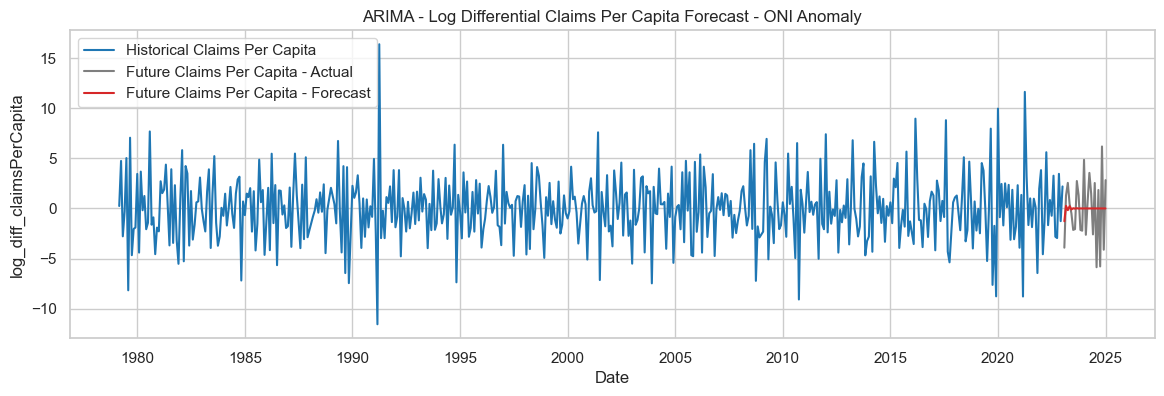

In [32]:
xbest = best_params
print("Best Parameters Found:")
print(xbest)

model = ARIMA(
    endog=df_train['log_diff_claimsPerCapita'],

    order=(xbest['p'], xbest['d'], xbest['q']),
    trend=[xbest['a0'], xbest['a1']],

).fit()

forecast = model.forecast(steps=df_test.shape[0])
sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))
plt.plot(df_train['Date'], df_train['log_diff_claimsPerCapita'], label='Historical Claims Per Capita', color='tab:blue')
plt.plot(df_test['Date'], df_test['log_diff_claimsPerCapita'], label='Future Claims Per Capita - Actual', color='tab:grey')
plt.plot(df_test['Date'], forecast, label='Future Claims Per Capita - Forecast', color='tab:red')

plt.xlabel('Date')
plt.ylabel('log_diff_claimsPerCapita')
plt.title('ARIMA - Log Differential Claims Per Capita Forecast - ONI Anomaly')
plt.legend()
plt.show()

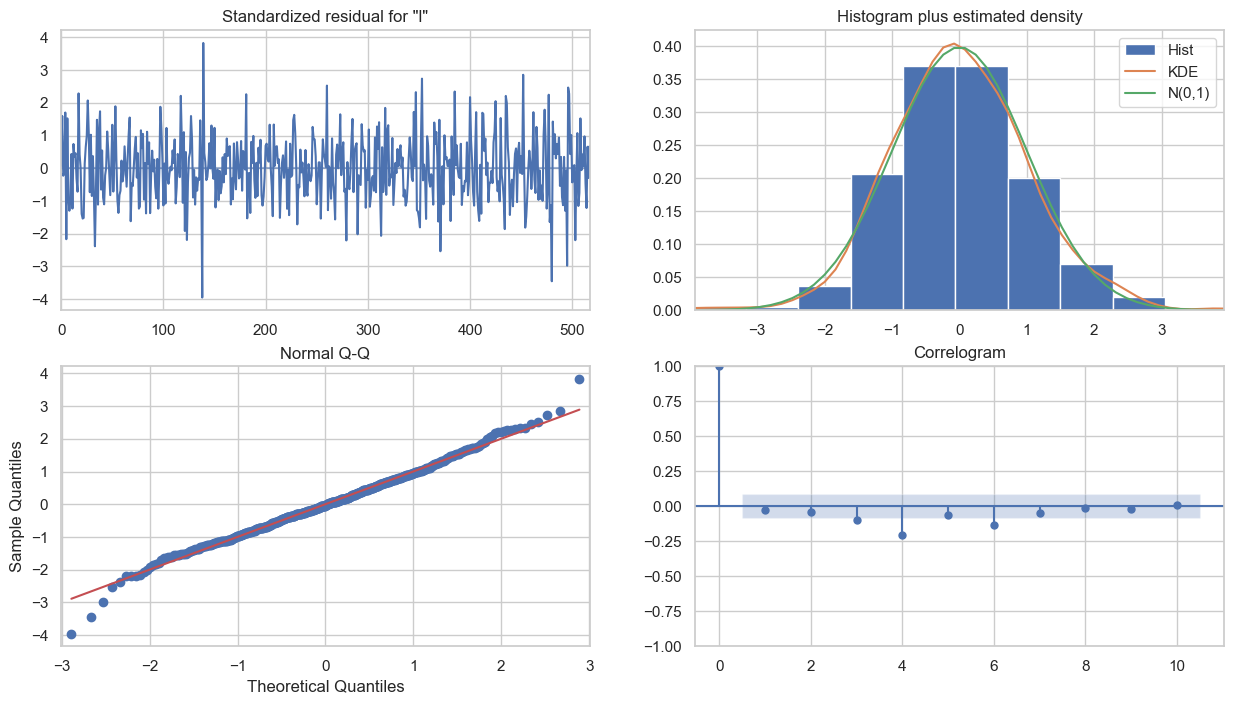

In [33]:
model.plot_diagnostics(figsize=(15, 8))
plt.show()